# Connecting to GoogleDrive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing of all required libraries

In [2]:
from numpy import asarray
import numpy as np 
import os
import matplotlib.pyplot as plt
import imageio
import random
import matplotlib.image as mpimg
from keras.models import Sequential
from keras import layers
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers import concatenate
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# GPU available

In [3]:
!nvidia-smi

Tue Feb 21 13:13:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# RAM available (in GB)

In [4]:
! free -g

              total        used        free      shared  buff/cache   available
Mem:             83           1          61           0          20          81
Swap:             0           0           0


# Image shape

In [5]:
IMG_WIDTH = 100
IMG_HEIGHT = 100
EPOCHS = 50

# Loading of NumPy arrays

In [6]:
X_train = np.load('/content/drive/MyDrive/wildfire/numpy/X_train_balanced.npy')
y_train = np.load('/content/drive/MyDrive/wildfire/numpy/y_train_balanced.npy')

X_val = np.load('/content/drive/MyDrive/wildfire/numpy/X_validation.npy')
y_val = np.load('/content/drive/MyDrive/wildfire/numpy/y_validation.npy')

X_test = np.load('/content/drive/MyDrive/wildfire/numpy/X_test.npy')
y_test = np.load('/content/drive/MyDrive/wildfire/numpy/y_test.npy')

# LeNet

In [7]:
kernel_initializer = keras.initializers.glorot_uniform(seed = np.random.randint(20))

lenet = Sequential()
lenet.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Conv2D(filters = 48, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Flatten())
lenet.add(layers.Dense(256, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(84, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(2, activation = 'softmax'))

print(lenet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25392)             0         
                                                                 
 dense (Dense)               (None, 256)               6

# LeNet training

In [8]:
lenet.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
es = tf.keras.callbacks.EarlyStopping(monitor = 'loss', mode = 'auto', verbose = 1, patience = 2)
history = lenet.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_val, y_val),  batch_size = 128, callbacks = [es])

Epoch 1/50
247/247 [==============================] - 9s 17ms/step - loss: 0.2929 - accuracy: 0.8728 - val_loss: 0.2167 - val_accuracy: 0.9105
Epoch 2/50
247/247 [==============================] - 3s 12ms/step - loss: 0.2050 - accuracy: 0.9238 - val_loss: 0.1399 - val_accuracy: 0.9449
Epoch 3/50
247/247 [==============================] - 3s 12ms/step - loss: 0.1795 - accuracy: 0.9301 - val_loss: 0.1549 - val_accuracy: 0.9405
Epoch 4/50
247/247 [==============================] - 3s 12ms/step - loss: 0.1688 - accuracy: 0.9372 - val_loss: 0.1281 - val_accuracy: 0.9521
Epoch 5/50
247/247 [==============================] - 3s 12ms/step - loss: 0.1590 - accuracy: 0.9399 - val_loss: 0.1407 - val_accuracy: 0.9486
Epoch 6/50
247/247 [==============================] - 3s 12ms/step - loss: 0.1394 - accuracy: 0.9472 - val_loss: 0.1271 - val_accuracy: 0.9513
Epoch 7/50
247/247 [==============================] - 3s 12ms/step - loss: 0.1335 - accuracy: 0.9501 - val_loss: 0.1350 - val_accuracy: 0.9529

# LeNet predictions on test set

In [9]:
y_prob = lenet.predict(X_test)
y_pred = y_prob.argmax(axis=-1)

197/197 [==============================] - 1s 3ms/step


# Confusion matrix

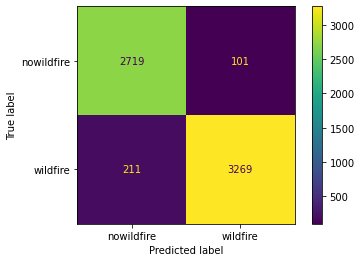

In [10]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['nowildfire','wildfire'])
disp.plot()
plt.show()

# Performance

In [11]:
score = lenet.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

197/197 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.9505
Test loss: 0.20762895047664642
Test accuracy: 0.9504761695861816


# Saving the model

In [12]:
model_path = "/content/drive/MyDrive/wildfire/model/lenet.h5"
lenet.save(model_path)
lenet = keras.models.load_model(model_path)